In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray

In [3]:
import pandas as pd
import cv2

# Morphological Operations
image processing operations to manipulate shape of image’s objects. Similar to convolutional kernels, morphological operations utilize a structuring element to transform each pixel of an image to a value based on its neighbors’ value.

## Structure Element

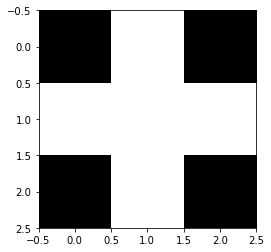

In [3]:
# structuring element : array of any size smaller than the image
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(element, cmap='gray');

# Testing mask

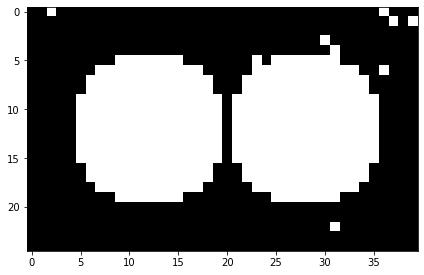

In [4]:
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range(20):
   circle_image[np.random.randint(25), np.random.randint(40)] = 1
imshow(circle_image);

## Erosion
Erosion removes islands and small objects so that only the key features will remain.
## dilation 
makes objects more visible and fills in small holes in objects.

Text(0.5, 1.0, 'Dilated Image')

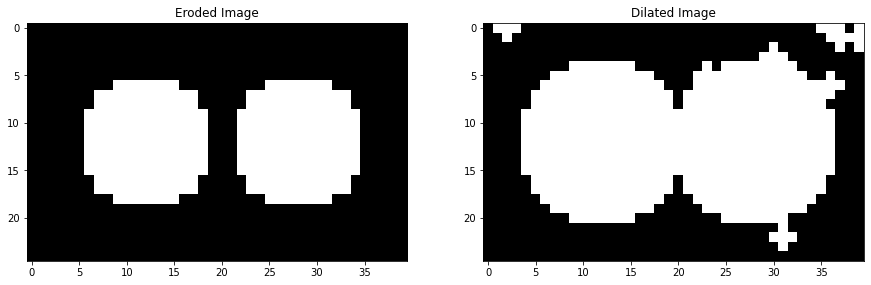

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(erosion(circle_image, element), cmap='gray'); # the outermost layer of the circles is eroded making circles smaller than original image
ax[0].set_title('Eroded Image')
ax[1].imshow(dilation(circle_image, element), cmap='gray') # two circles expanded to the point that they already touched each other.
ax[1].set_title('Dilated Image')

## Successive erosion /dilation 
Done for Larger images 

Text(0.5, 1.0, 'Multi-Dilated Image')

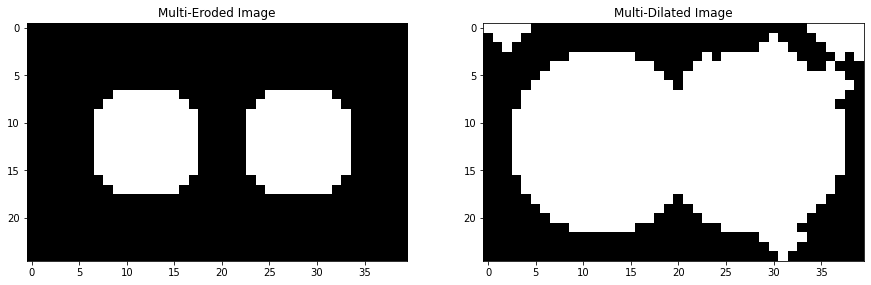

In [6]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(circle_image, 2, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(circle_image, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image')

## Opening
erosion and dilation
## Clsoing
dilation and errosion

Text(0.5, 1.0, 'Closed Image')

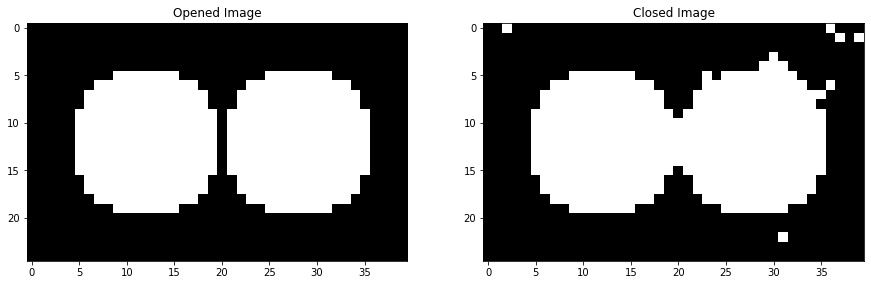

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(opening(circle_image, element), cmap='gray');
ax[0].set_title('Opened Image')
ax[1].imshow(closing(circle_image, element), cmap='gray')
ax[1].set_title('Closed Image')

## Try on track masks prepared

In [4]:
#these codes are used to loop through the directory
path_images = 'rs19_val/jpgs/rs19_val/'
path_images_resized = 'rs19_val/960_512/images_resized/'
path_masks = 'rs19_val/uint8/rs19_val/'
path_masks_resized = 'rs19_val/960_512/masks_resized_track/'


# read the tram list and turn it into a dict
tram_list = pd.read_csv('tram_filenames.csv')
tram_dict = tram_list.iloc[:,1:].to_dict()

In [5]:
file='rs00079'

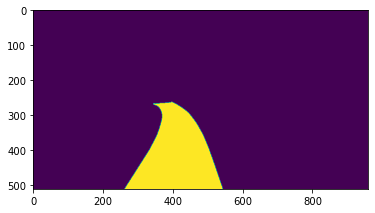

In [6]:
mask_input= cv2.imread(path_masks_resized+file+'.png.png',0)
plt.imshow(mask_input)

In [37]:
mask_input
mask_input_32= cv2.resize(mask_input, (32,32),interpolation= cv2.INTER_NEAREST)

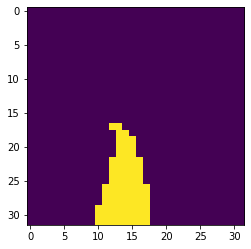

In [38]:
plt.imshow(mask_input_32)

In [39]:
np.set_printoptions(threshold=np.inf)

print(f"My fully printed array: \n {mask_input_32}")

My fully printed array: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# fill the lines with inverted triangle

In [29]:
element = np.array([[0,0,0,0,0,1,0,0,0,0,0],
                    [0,0,0,0,1,1,1,0,0,0,0],
                    [0,0,0,1,1,1,1,1,0,0,0],
                    [0,0,0,1,1,1,1,1,0,0,0],
                    [0,0,0,1,1,1,1,1,0,0,0],
                    [0,0,1,1,1,1,1,1,1,0,0],
                    [0,0,1,1,1,1,1,1,1,0,0],
                    [0,1,1,1,1,1,1,1,1,1,0],
                    [0,1,1,1,1,1,1,1,1,1,0],
                    [1,1,1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,1,1,1]])

In [30]:
element.shape

(11, 11)

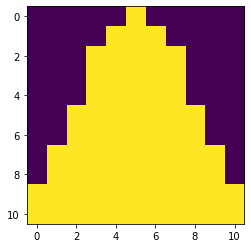

In [31]:
plt.imshow(element)

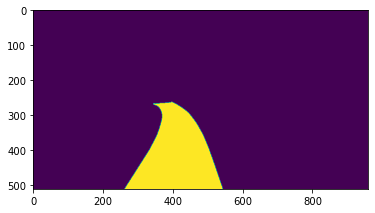

In [9]:
plt.imshow(mask_input)

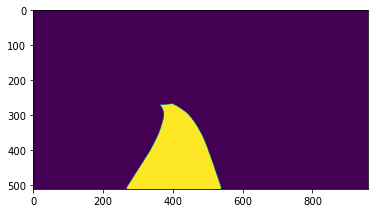

In [35]:
plt.imshow(erosion(mask_input, element))

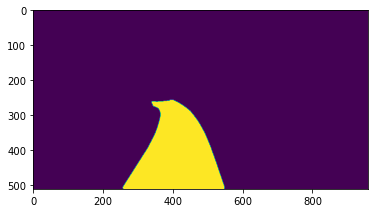

In [36]:
plt.imshow(dilation(mask_input, element))

In [37]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

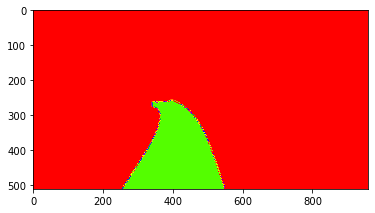

In [10]:
initial_kernel = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(mask_input, initial_kernel, iterations=1)

for i in range(128):
    kernel = np.ones((15+i,15+i), np.uint8)
    img_dilation[128+i:129+i, 255-i:256+i] = cv2.dilate(mask_input[128+i:129+i, 255-i:256+i], kernel, iterations=1)

plt.imshow(img_dilation, cmap='prism')

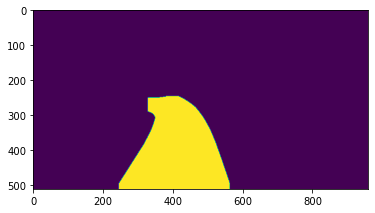

In [24]:
initial_kernel = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(mask_input, initial_kernel, iterations=4)

plt.imshow(img_dilation)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 

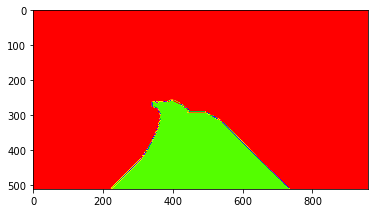

In [15]:
initial_kernel = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(mask_input, initial_kernel, iterations=1)

for i in range(256):
    kernel = np.ones((15+i,15+i), np.uint8)
    print(kernel)
    img_dilation[256+i:257+i, 479-i:480+i] = cv2.dilate(mask_input[256+i:257+i, 479-i:480+i], kernel, iterations=2)

plt.imshow(img_dilation, cmap='prism')

In [17]:
kernel.shape

(270, 270)

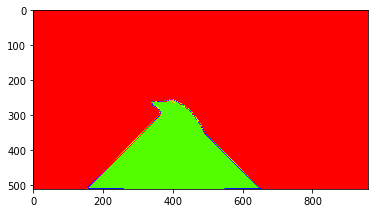

In [42]:

#initial_kernel = element
#img_dilation = cv2.dilate(mask_input, element, iterations=1)
img_dilation= dilation(mask_input,element)

coord = cv2.findNonZero(mask_input)
length = len(coord) - 1 
coord_width = []
coord_height = []
for k in range(length):
    coord_width.append(coord[:][k][0][0])
    coord_height.append(coord[:][k][0][1])

iter = max(coord_height) - min(coord_height)
highest = min(coord_height)
highest_1 = min(coord_height) + 1 

width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
width_mid = int(width_mid)
width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
width_mid_1 = int(width_mid_1)

for i in range(iter):
    kernel = np.ones((20+i,20+i), np.uint8)
    img_dilation[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask_input[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=2)

plt.imshow(img_dilation, cmap='prism')


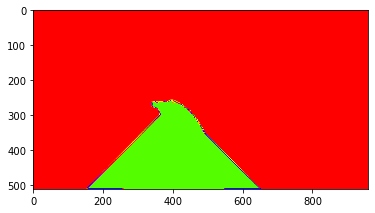

In [43]:
initial_kernel = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(mask_input, initial_kernel, iterations=1)
#img_dilation= dilation(mask_input,element)

coord = cv2.findNonZero(mask_input)
length = len(coord) - 1 
coord_width = []
coord_height = []
for k in range(length):
    coord_width.append(coord[:][k][0][0])
    coord_height.append(coord[:][k][0][1])

iter = max(coord_height) - min(coord_height)
highest = min(coord_height)
highest_1 = min(coord_height) + 1 

width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
width_mid = int(width_mid)
width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
width_mid_1 = int(width_mid_1)

for i in range(iter):
    kernel = np.ones((20+i,20+i), np.uint8)
    img_dilation[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask_input[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=2)

plt.imshow(img_dilation, cmap='prism')


In [46]:
img_dilation = dilation(img_dilation,element)

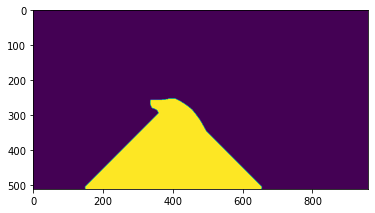

In [47]:
plt.imshow(img_dilation)

# Another try 

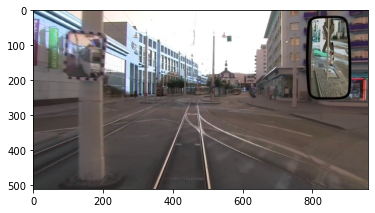

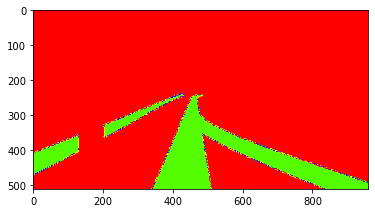

In [64]:
file1='rs00087'
image_input=cv2.imread(path_images_resized+file1+'.jpg.jpg',1)
mask_input= cv2.imread(path_masks_resized+file1+'.png.png',0)
plt.imshow(image_input)
plt.show()
plt.imshow(mask_input,cmap='prism')
plt.show()

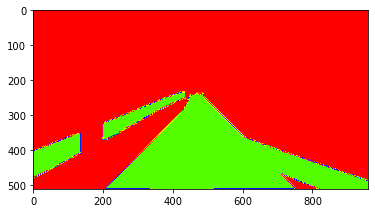

In [53]:
initial_kernel = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(mask_input, initial_kernel, iterations=1)
#img_dilation= dilation(mask_input,element)

coord = cv2.findNonZero(mask_input)
length = len(coord) - 1 
coord_width = []
coord_height = []
for k in range(length):
    coord_width.append(coord[:][k][0][0])
    coord_height.append(coord[:][k][0][1])

iter = max(coord_height) - min(coord_height)
highest = min(coord_height)
highest_1 = min(coord_height) + 1 

width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
width_mid = int(width_mid)
width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
width_mid_1 = int(width_mid_1)

for i in range(iter):
    kernel = np.ones((20+i,20+i), np.uint8)
    img_dilation[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask_input[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=2)

plt.imshow(img_dilation, cmap='prism')

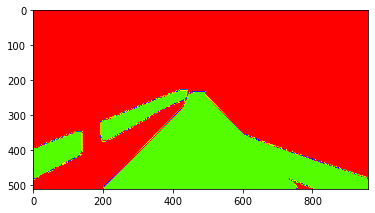

In [56]:
img_dilation_fill = dilation(img_dilation,element)
plt.imshow(img_dilation_fill,cmap='prism')

# 11x11 kernel using dilation only 

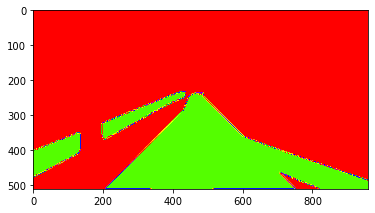

In [58]:
#initial_kernel = np.ones((10,10), np.uint8)
#img_dilation = cv2.dilate(mask_input, initial_kernel, iterations=1)
img_dilation_triangle11= dilation(mask_input,element)

coord = cv2.findNonZero(mask_input)
length = len(coord) - 1 
coord_width = []
coord_height = []
for k in range(length):
    coord_width.append(coord[:][k][0][0])
    coord_height.append(coord[:][k][0][1])

iter = max(coord_height) - min(coord_height)
highest = min(coord_height)
highest_1 = min(coord_height) + 1 

width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
width_mid = int(width_mid)
width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
width_mid_1 = int(width_mid_1)

for i in range(iter):
    kernel = np.ones((20+i,20+i), np.uint8)
    img_dilation_triangle11[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask_input[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=2)

plt.imshow(img_dilation_triangle11, cmap='prism')

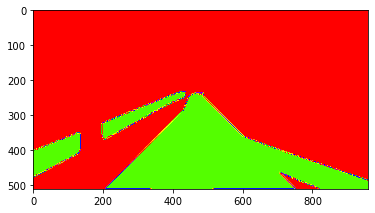

In [62]:
#initial_kernel = np.ones((10,10), np.uint8)
#img_dilation = cv2.dilate(mask_input, initial_kernel, iterations=1)
img_dilation_triangle11= dilation(mask_input,element)

coord = cv2.findNonZero(mask_input)
length = len(coord) - 1 
coord_width = []
coord_height = []
for k in range(length):
    coord_width.append(coord[:][k][0][0])
    coord_height.append(coord[:][k][0][1])

iter = max(coord_height) - min(coord_height)
highest = min(coord_height)
highest_1 = min(coord_height) + 1 

width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
width_mid = int(width_mid)
width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
width_mid_1 = int(width_mid_1)

for i in range(iter):
    kernel = np.ones((20+i,20+i), np.uint8)
    img_dilation_triangle11[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask_input[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=5)

plt.imshow(img_dilation_triangle11, cmap='prism')

In [66]:
img_dilation_triangle11

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

# try flip left to right and then right to left

In [90]:
import matplotlib.pyplot as plt
from PIL import Image

#read image (set image as m)
#m = Image.open('A-Input-image_Q320.jpg')
m=img_dilation_triangle11.copy()
#change image to array (set array as np_array)
np_array = np.array(m)
new_np_array = np.copy(np_array)

#define the width(w) and height(h) of the image
h, w = np_array.shape

#make the image upside down
for i in range(0,h):
    for j in range(0,w):
        new_np_array[i,j] = np_array[h-1-i,j]
        
#change array back to image (set processed image as pil_image)
pil_image = Image.fromarray(new_np_array)

#open the processed image
pil_image.show()

#save the processed image
pil_image.save('upsidedown.bmp')

IndexError: index 959 is out of bounds for axis 0 with size 512

In [69]:
img_dilation_triangle11=np.array(img_dilation_triangle11)

In [73]:
label,counts= np.unique(img_dilation_triangle11,return_counts=True)
print (label)
print(counts)

[0 1]
[380999 110521]


# fill the area between the lines

In [79]:
import numpy as np 
import cv2

#img = cv2.imread(img_dilation_triangle11)
img = img_dilation_triangle11.copy()
h, w = img.shape[:2]

x = np.arange(w)
polynomial1 = lambda x: x**2/800
polynomial2 = lambda x: x+200
y1 = polynomial1(x)
y2 = polynomial2(x)

points1 = np.array([[[xi, yi]] for xi, yi in zip(x, y1) if (0<=xi<w and 0<=yi<h)]).astype(np.int32)
points2 = np.array([[[xi, yi]] for xi, yi in zip(x, y2) if (0<=xi<w and 0<=yi<h)]).astype(np.int32)
points = np.concatenate((points1, np.flip(points2, 0)))

polynomialgon = img.copy()
cv2.fillPoly(polynomialgon, [points], color=[255,255,255])
cv2.imshow('Polygon defined by two polynomials', polynomialgon)
cv2.waitKey(0)

-1

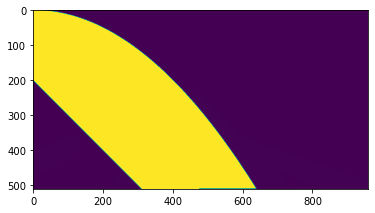

In [80]:
plt.imshow(polynomialgon)

In [ ]:
#Get starting images
shade_image = np.zeros_like(image)
line_image = plot_lines(shade_image, left_line, right_line)
#Choose color
shade_color = [0, 255, 0]
#Iterate through and fill blank image
left_switch = False
right_switch = False
for i in range(0, image.shape[0]):
    left_switch = False
    right_switch = False
    for j in range(0, image.shape[1]):
        if left_switch & right_switch: shade_image[i][j] = shade_color
        #Find left edge of left line
        if (not left_switch) & (not right_switch) & np.any(line_image[i][j] != 0):
            left_switch = True
        #Find right edge of left line
        elif left_switch & (not right_switch) & np.all(line_image[i][j] == 0):
            right_switch = True
        #Find left edge of left line
        elif left_switch & right_switch & np.any(line_image[i][j] != 0):
            break
        #In case of a single line, no shading
        elif left_switch & right_switch & (j == (image.shape[1] - 1)):
             shade_image[i].fill(0)
#Shade lane area
output_image = cv2.addWeighted(image, 1.0, shade_image, 1.0, gamma=0.0)